In [60]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
import csv

from random import seed
from random import gauss
import random 
random.seed(5)
    
from shapely.ops import polygonize
from shapely.geometry import Polygon
from shapely.geometry import MultiPolygon
from shapely.geometry import MultiLineString
from shapely.geometry import CAP_STYLE, JOIN_STYLE
from shapely.ops import cascaded_union
from shapely.geometry import box
from shapely.geometry import LineString
from shapely.geometry import LinearRing
from shapely.geometry import Point
from shapely.geometry import MultiPoint

In [63]:
class vector(object):
    def __init__(self,x,y):
        self.x = float(x)
        self.y = float(y)
    def get_angle(self):
        return(np.angle(self.x + self.y*1j)) #Check
    def get_length(self):
        return math.sqrt(self.x*self.x + self.y*self.y)
    def set_angle(self,angle):
        l = self.get_length()
        self.x = math.cos(angle)*l
        self.y = math.sin(angle)*l
    def set_length(self,l):
        angle = self.get_angle()
        self.x = math.cos(angle)*l
        self.y = math.sin(angle)*l
    def add_v(self,v):
        self.x += v.x
        self.y += v.y
    def sub_v(self,v):
        self.x -= v.x
        self.y -= v.y
    def sclar_multi(self,k):
        self.x = self.x*k
        self.y = self.y*k
    def rotate_vector(self,angle,clockwise):
        if clockwise:
            self.set_angle(self.get_angle() - angle)
        else:
            self.set_angle(self.get_angle() + angle)

In [66]:
class line(object):
    def __init__(self,point1,point2):
        self.x1 = float(point1[0])
        self.x2 = float(point2[0])
        self.y1 = float(point1[1])
        self.y2 = float(point2[1])
        self.d = math.sqrt((self.y2-self.y1)*(self.y2-self.y1) + (self.x2-self.x1)*(self.x2-self.x1))
        if self.x1 == self.x2:
            self.m = float(1000000)
        else:
            self.m = float((self.y2 - self.y1)/(self.x2 - self.x1))
        self.c = float((self.y1 - self.m*self.x1))
    def distance_from_line(self,point):
        return abs((self.m*point[0] -  point[1] + self.c)/math.sqrt(1 + self.m*self.m))    

In [69]:
def plot_coords(coords):
    pts = list(coords)
    x,y = zip(*pts)
    plt.plot(x,y)
    
def plot_polys(polys):

    plot_coords(polys.exterior.coords)

    for hole in polys.interiors:
        plot_coords(hole.coords)

def plot_ring(ring):
    plot_coords(ring.coords)

In [ ]:
def line_intersect(m1, b1, m2, b2):
    if m1 == m2:
        print ("These lines are parallel!!!")
        return None
    x = (b2 - b1) / (m1 - m2)
    y = m1 * x + b1
    return x,y

In [ ]:
def distance_points(x1,y1,x2,y2):
    return math.sqrt((x1-x2)*(x1-x2) + (y1-y2)*(y1-y2)) 

In [ ]:
def generate_polygon(n = 10,u =1):
    
    angle = 2*math.pi/n
    coords = []
    for i in range(n):
        length = abs(gauss(u,1)) #Ye shi karna baaki hai
        
        coords.append((length*math.cos(i*angle),length*math.sin(i*angle)))
    return coords  

In [ ]:
polygons = []
for i in range(100):
    coords = generate_polygon(10)
    r = LinearRing(coords)
    s = Polygon(r)
    polygons.append(s)
    plot_polys(s)
    plt.show()

In [ ]:
def random_p(polygon):
    return polygon.representative_point()
    
def inside_polygon(polygon,point):
    return polygon.contains(point)

def inside_polygon_1(polygon,vector):
    point = Point(vector.x,vector.y)
    return polygon.contains(point)

#def random_velocity(u = 0,v = 0):
   # return (abs(u + gauss(0,1)),abs(v+ gauss(0,1)))
    




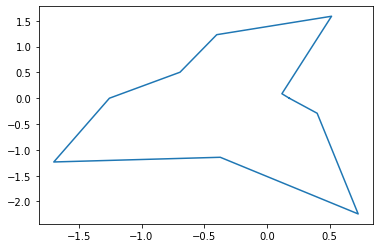

In [72]:
coords = generate_polygon()
r = LinearRing(coords)
polygon = Polygon(r)
plot_polys(polygon)
plt.show()
line_segments = []
for i in range(9):
    l = line(coords[i],coords[i+1])
    line_segments.append(l)
l = line(coords[9],coords[0])
line_segments.append(l)

In [ ]:
def collision_data_f(position,prev,line_segments,velocity):
    point = [position.x,position.y]
    minm_distance = line_segments[9].distance_from_line(point)
    index = 9
    
    for i in range(9):
        if (line_segments[i].distance_from_line(point) < minm_distance):
            index = i
            minm_distance = line_segments[i].distance_from_line(point)
    d = line_segments[index].d
    #m_rad = math.atan(line_segments[index].m)
    prev_tuple = (prev.x,prev.y)
    position_tuple = (position.x,position.y)
    velocity_line = line(prev_tuple,position_tuple)
    intersect = line_intersect(velocity_line.m,velocity_line.c,line_segments[index].m, line_segments[index].c)
    acute_angle = math.atan(abs((velocity_line.m - line_segments[index].m)/(1 + line_segments[index].m*velocity_line.m)))
    #print(acute_angle)
    d1 = distance_points(intersect[0],intersect[1], line_segments[index].x1,line_segments[index].y1)
    d2 = distance_points(intersect[0],intersect[1], prev.x, prev.y)
    d3 = distance_points(prev.x,prev.y, line_segments[index].x1,line_segments[index].y1)
    #print(d1,d1*d1,d2,d2*d2,d3,d3*d3)
    #print(d1*d1+d2*d2)
    #print(d3*d3)
    if ((d1*d1 + d2*d2) < d3*d3):
        angle = math.pi - acute_angle
    else:
        angle = acute_angle
    return (d,angle,i)
    

In [96]:
for iteration_number in range(5000): 
        #print(position.x, position.y)
    random_angle = 2*math.pi*random.random()
    velocity = vector(1,1)
    velocity.set_angle(random_angle)
    velocity.set_length(0.01)
    random_point = random_p(polygon)
    
    position = vector(random_point.x,random_point.y)

    speed_i = []
    angle_i = []
    collision_data = []
    prevx = 0
    prevy = 0
    collision_count = 0
    collision_index = []

    #while collision_count < 20:
    for i in range(200):
        prevx = position.x
        prevy = position.y
        position.add_v(velocity)
        #print(position.x,position.y)

        if inside_polygon_1(polygon,position):
            continue
        else:
            #print("This is collision number ",collision_count+1)
            #print(position.x,position.y, " position coordinates")
            prev = vector(prevx,prevy)
            #print(prev.x,prev.y,"   prev coordinates ")
            #print(velocity.x,velocity.y," velocity")
            collision_data.append(collision_data_f(position,prev,line_segments,velocity))
            collision_index.append(i)
            angle = collision_data[collision_count][1]
            #print(angle)
            velocity.rotate_vector(math.pi + 2*angle,False)
            velocity.x = 0 - velocity.x
            velocity.y = 0 - velocity.y
            #print(velocity.x,velocity.y," velocity new")
            collision_count = collision_count+1
            position.x = prevx
            position.y = prevy
            #print(position.x,position.y, " position coordinates")
    #print(collision_data)
    print(len(final_x_y))

AttributeError: 'list' object has no attribute 'len'

In [81]:
for i in range(collision_count):
    row = collision_data[i]
    with open('CollisionData.csv', 'a') as csvFile:
        writer = csv.writer(csvFile)
        writer.writerow(row)
    csvFile.close()

In [ ]:

for i in range(collision_count):
    import csv
    csvData = collision_data[i]
    with open('person.csv', 'w') as csvFile:
        writer = csv.writer(csvFile)
        writer.writerows(csvData)
    csvFile.close()